In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_page= int(input("페이지 수를 입력하세요: "))

페이지 수를 입력하세요: 20


In [15]:
base_url_naver= "https://finance.naver.com/item/frgn.nhn?code=035720&page={}"

naver_url_list= []
for i in range(n_page):
    naver_url_list.append(base_url_naver.format(i+1))

In [16]:
naver_resp_list= []
for url in naver_url_list:
    naver_resp_list.append(requests.get(url))

In [17]:
naver_soup_list= []
for resp in naver_resp_list:
    naver_soup_list.append(BeautifulSoup(resp.text))

In [18]:
naver_table_list= []
for soup in naver_soup_list:
    for i in range(20): # 한 페이지에 20개의 날짜들이 있음
        naver_table_list.append({
        'date': soup.select('table.type2')[1].select('span')[9*i].text.replace('.','-'),
        'stocks': soup.select('table.type2')[1].select('span')[9*i + 1].text.replace(',',''),
        'ratio': soup.select('table.type2')[1].select('span')[9*i + 3].text.strip().replace('%',''),
        'tradevolume': soup.select('table.type2')[1].select('span')[9*i + 4].text.replace(',',''),
        'agencyvolume': soup.select('table.type2')[1].select('span')[9*i + 5].text.replace(',',''),
        'foreignvolume': soup.select('table.type2')[1].select('span')[9*i + 6].text.replace(',',''),
        'foreignratio': soup.select('table.type2')[1].select('span')[9*i + 8].text.replace('%','')
    })

In [22]:
naver_final_list= naver_table_list.copy()
naver_final_list.reverse()

In [23]:
naver_final_list

[{'date': '2018-12-11',
  'stocks': '107000',
  'ratio': '-3.60',
  'tradevolume': '461496',
  'agencyvolume': '+1583',
  'foreignvolume': '+10306',
  'foreignratio': '24.91'},
 {'date': '2018-12-12',
  'stocks': '110000',
  'ratio': '+2.80',
  'tradevolume': '393740',
  'agencyvolume': '+5021',
  'foreignvolume': '+34964',
  'foreignratio': '24.97'},
 {'date': '2018-12-13',
  'stocks': '111500',
  'ratio': '+1.36',
  'tradevolume': '494887',
  'agencyvolume': '-36181',
  'foreignvolume': '+135901',
  'foreignratio': '25.07'},
 {'date': '2018-12-14',
  'stocks': '110000',
  'ratio': '-1.35',
  'tradevolume': '196803',
  'agencyvolume': '-5809',
  'foreignvolume': '+28536',
  'foreignratio': '25.08'},
 {'date': '2018-12-17',
  'stocks': '110500',
  'ratio': '+0.45',
  'tradevolume': '173155',
  'agencyvolume': '+34775',
  'foreignvolume': '+13765',
  'foreignratio': '25.09'},
 {'date': '2018-12-18',
  'stocks': '108500',
  'ratio': '-1.81',
  'tradevolume': '188963',
  'agencyvolume': '

In [24]:
naver_final= pd.DataFrame(naver_final_list)

# type 변환하기

In [25]:
naver_final.date= naver_final.date.astype('datetime64')
naver_final.stocks= naver_final.stocks.astype('int')
naver_final.ratio= naver_final.ratio.astype('float')
naver_final.tradevolume= naver_final.tradevolume.astype('int')
naver_final.agencyvolume= naver_final.agencyvolume.astype('int')
naver_final.foreignvolume= naver_final.foreignvolume.astype('int')
naver_final.foreignratio= naver_final.foreignratio.astype('float')

In [26]:
naver_final.dtypes

date             datetime64[ns]
stocks                    int32
ratio                   float64
tradevolume               int32
agencyvolume              int32
foreignvolume             int32
foreignratio            float64
dtype: object

In [27]:
naver_final

,date,stocks,ratio,tradevolume,agencyvolume,foreignvolume,foreignratio
0,2018-12-11,107000,-3.60,461496,1583,10306,24.91
1,2018-12-12,110000,2.80,393740,5021,34964,24.97
2,2018-12-13,111500,1.36,494887,-36181,135901,25.07
3,2018-12-14,110000,-1.35,196803,-5809,28536,25.08
4,2018-12-17,110500,0.45,173155,34775,13765,25.09
...,...,...,...,...,...,...,...
395,2020-07-20,310000,-4.62,1534422,-125201,-244154,33.18
396,2020-07-21,316000,1.94,1676630,1319,-204265,32.95
397,2020-07-22,318000,0.63,1159298,-3053,-39041,32.90
398,2020-07-23,329500,3.62,1260435,29294,104215,33.02


In [28]:
naver_final.to_csv("dataset/Naver_Stocks.csv")

In [29]:
naver_final.iloc[:,:2]

,date,stocks
0,2018-12-11,107000
1,2018-12-12,110000
2,2018-12-13,111500
3,2018-12-14,110000
4,2018-12-17,110500
...,...,...
395,2020-07-20,310000
396,2020-07-21,316000
397,2020-07-22,318000
398,2020-07-23,329500


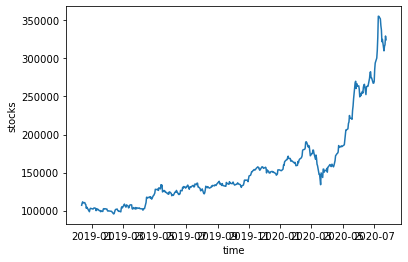

In [30]:
plt.plot(naver_final.iloc[:,0], naver_final.iloc[:,1])
plt.xlabel("time")
plt.ylabel("stocks")
plt.show()

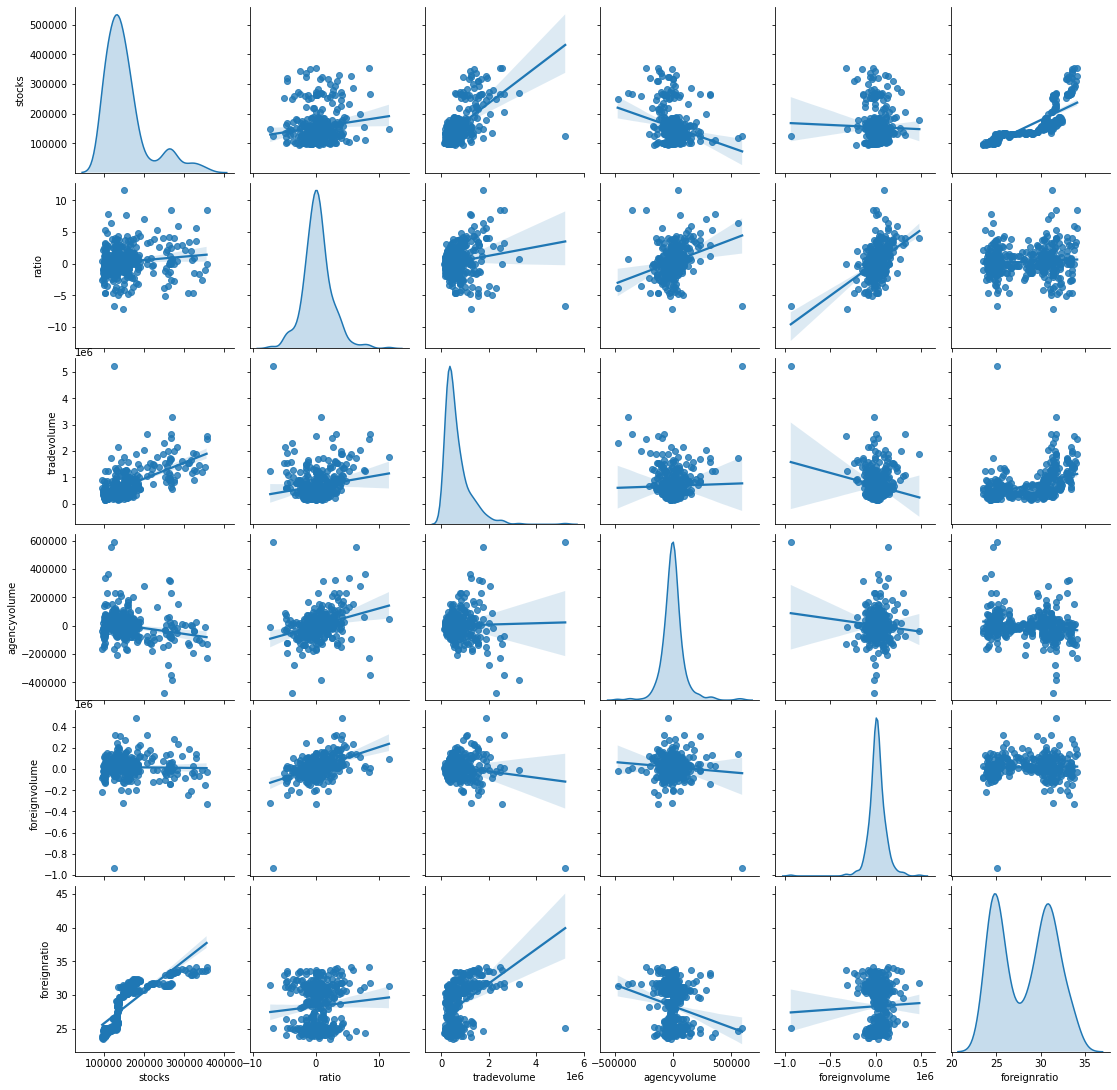

In [31]:
sns.pairplot(naver_final, kind= 'reg', diag_kind= 'kde')

# 앞으로 할 일
- 상관계수 구하고 상관관계 관찰하기
    - LinearRegression으로 변인 간 선형관계 파악하기
- 시계열분석으로 추세 파악하기
    - ARIMA model
    - LOWESS curve
- LSTM / Recurrence Plot으로 딥러닝 기법 적용해보기